# 🧭 Анализ данных микрокредитной организации для снижения просрочек и увеличения клиентской базы

---

## Введение

**Цель проекта:**  
Провести глубокий анализ данных микрокредитной организации, чтобы выявить ключевые факторы, влияющие на вероятность просрочек по кредитам, а также определить закономерности, которые помогут увеличить число кредиторов и оптимизировать процессы выдачи кредитов.

**Почему это важно:**  
Просрочки по выплатам кредитов увеличивают финансовые риски компании и снижают прибыль. Оптимизация процесса и понимание поведения клиентов позволит улучшить качество портфеля и увеличить лояльность заемщиков.

---

## Содержание

1. Загрузка и обзор данных
2. Предварительная обработка данных
3. Исследовательский анализ данных (EDA) :
 - График распределения просрочек по дням (гистограмма)
 - График динамики просрочек по месяцам (средняя просрочка)
 - График доли просроченных заявок по месяцам
 - График отклонений от плановой суммы
 - Процент своевременных платежей
 - Просрочка по категориям (кратковременные, средние, длительные просрочки)
 - График отклонений от плановой суммы по месяцам
4. Выявление корреляций и зависимостей
5. Заключение
6. Контакты

---

## Методология и подходы

Для анализа использовались данные по платежам и плановым суммам, объединенные по уникальному номеру заявки. Для визуализации данных, использовались следующие методы:

* Гистограмма для распределения просрочек по дням.
* Линейный график для динамики просрочек по месяцам.
* Столбчатая диаграмма для доли просроченных заявок.
* Анализ отклонений от плановой суммы и процент своевременных платежей.

---

## Основные метрики и показатели

В рамках анализа были вычислены ключевые метрики:

* Средняя просрочка по заявкам: показала, сколько в среднем клиентов откладывают оплату.
* Процент просроченных заявок: доля всех заявок, которые не были оплачены в срок.
* Отклонение от плановой суммы: насколько фактические платежи отклоняются от запланированных сумм.
* Доля своевременных платежей: процент клиентов, которые соблюдают график платежей.


# 🔎 Анализ данных

<a id="file_connection"></a>
## 📁 Подключение файлов и создание датафреймов

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir('/content/drive/MyDrive/Devim')

In [4]:
!ls

Devim_credit_risk_analysis.ipynb  orders.csv  payments.csv  plan.csv


In [5]:
df_orders = pd.read_csv('orders.csv')
df_payments = pd.read_csv('payments.csv')
df_plan = pd.read_csv('plan.csv')

In [6]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55748 entries, 0 to 55747
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    55748 non-null  int64  
 1   created_at  55748 non-null  object 
 2   put_at      55748 non-null  object 
 3   closed_at   46472 non-null  object 
 4   issued_sum  55748 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ MB


In [7]:
df_orders.head(10)

,order_id,created_at,put_at,closed_at,issued_sum
0,400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0
1,400005838,2022-06-02 00:10:22.997,2022-06-02 15:41:33.267,2022-06-02 17:38:43.917,20000.0
2,400007915,2022-06-02 00:18:04.000,2022-06-05 19:17:38.547,2022-06-21 21:55:51.877,5820.0
3,400008952,2022-06-02 00:22:07.000,2022-06-03 14:25:18.033,2022-07-12 10:47:46.307,9000.0
4,400009027,2022-06-02 00:25:39.000,2022-06-02 00:40:40.320,2022-06-22 14:15:07.423,5000.0
5,400010534,2022-06-02 00:46:35.000,2022-06-02 11:42:04.560,2022-07-14 22:15:19.217,14600.0
6,400013633,2022-06-02 00:46:38.000,2022-06-02 00:47:46.277,2022-06-16 03:15:48.960,9500.0
7,400014289,2022-06-02 01:12:32.000,2022-06-02 01:14:07.683,2022-06-06 15:04:37.347,10000.0
8,400014330,2022-06-02 01:13:39.997,2022-06-02 10:56:18.277,2022-06-13 12:16:33.123,5430.0
9,400014464,2022-06-02 01:17:28.000,2022-06-02 01:22:27.323,2022-06-06 16:29:00.720,3000.0


In [8]:
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143284 entries, 0 to 143283
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   order_id  143284 non-null  int64  
 1   paid_at   143284 non-null  object 
 2   paid_sum  143284 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ MB


In [9]:
df_payments.head(10)

,order_id,paid_at,paid_sum
0,400013633,2022-06-02 00:48:13.800,2500.0
1,400018480,2022-06-02 01:52:05.707,1070.0
2,400032001,2022-06-02 04:55:40.307,4200.0
3,400033195,2022-06-02 05:44:23.480,2850.0
4,400039407,2022-06-02 06:53:54.503,10100.0
5,400116494,2022-06-02 08:09:42.393,4200.0
6,400138751,2022-06-02 09:39:18.877,11110.0
7,400224041,2022-06-02 10:33:26.510,3570.0
8,400020168,2022-06-02 10:39:36.157,4200.0
9,400024960,2022-06-02 10:40:25.193,2500.0


In [10]:
df_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420282 entries, 0 to 420281
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   order_id        420282 non-null  int64  
 1   plan_at         420282 non-null  object 
 2   plan_sum_total  420282 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.6+ MB


In [11]:
df_plan.head(10)

,order_id,plan_at,plan_sum_total
0,400001732,2022-06-02,5600.0
1,400001732,2022-07-02,9450.0
2,400001732,2022-08-01,12170.0
3,400001732,2022-08-31,14890.0
4,400001732,2022-09-30,17610.0
5,400001732,2022-10-30,20330.0
6,400001732,2022-11-29,23050.0
7,400005838,2022-06-17,23000.0
8,400007915,2022-06-05,1820.0
9,400007915,2022-06-20,2730.0


<a id="data_preparation"></a>
## 🛠 Подготовка данных к анализу и визуализации



In [12]:
# Преобразование колонок с датами в datetime формат
df_orders['created_at'] = pd.to_datetime(df_orders['created_at'])
df_orders['put_at'] = pd.to_datetime(df_orders['put_at'])
df_orders['closed_at'] = pd.to_datetime(df_orders['closed_at'], errors='coerce')

In [13]:
df_payments['paid_at'] = pd.to_datetime(df_payments['paid_at'])
df_plan['plan_at'] = pd.to_datetime(df_plan['plan_at'])

In [14]:
# Объединение данных по order_id
merged_data = pd.merge(df_orders, df_payments, on='order_id', how='left')
merged_data = pd.merge(merged_data, df_plan, on='order_id', how='left')

In [15]:
# Создание колонки для просрочки (разница между фактической датой платежа и плановой)
merged_data['delay_days'] = (merged_data['paid_at'] - merged_data['plan_at']).dt.days

In [16]:
# Фильтрация для анализа просроченных платежей (delay_days > 0)
delayed_data = merged_data[merged_data['delay_days'] > 0]

In [17]:
merged_data.head(10)

,order_id,created_at,put_at,closed_at,issued_sum,paid_at,paid_sum,plan_at,plan_sum_total,delay_days
0,400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0,2022-06-02 20:20:16.790,5600.0,2022-06-02,5600.0,0.0
1,400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0,2022-06-02 20:20:16.790,5600.0,2022-07-02,9450.0,-30.0
2,400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0,2022-06-02 20:20:16.790,5600.0,2022-08-01,12170.0,-60.0
3,400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0,2022-06-02 20:20:16.790,5600.0,2022-08-31,14890.0,-90.0
4,400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0,2022-06-02 20:20:16.790,5600.0,2022-09-30,17610.0,-120.0
5,400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0,2022-06-02 20:20:16.790,5600.0,2022-10-30,20330.0,-150.0
6,400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0,2022-06-02 20:20:16.790,5600.0,2022-11-29,23050.0,-180.0
7,400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0,2022-06-16 16:05:26.007,3850.0,2022-06-02,5600.0,14.0
8,400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0,2022-06-16 16:05:26.007,3850.0,2022-07-02,9450.0,-16.0
9,400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0,2022-06-16 16:05:26.007,3850.0,2022-08-01,12170.0,-46.0


In [24]:
# Объединяем платежи с планом по order_id и дате планового платежа
df_payments_plan = pd.merge(df_plan, df_payments, how='left', on='order_id')

# Заполняем пропущенные даты оплаты (если платёж ещё не поступил)
df_payments_plan['paid_at'] = pd.to_datetime(df_payments_plan['paid_at'])
df_payments_plan['plan_at'] = pd.to_datetime(df_payments_plan['plan_at'])

# Рассчитываем задержку в днях (разница между фактической и плановой датой платежа)
df_payments_plan['delay_days'] = (df_payments_plan['paid_at'] - df_payments_plan['plan_at']).dt.days

# Если платеж не был осуществлен (NaN в paid_at), можно рассчитать задержку от текущей даты
import datetime
today = pd.Timestamp(datetime.datetime.now().date())
df_payments_plan.loc[df_payments_plan['paid_at'].isna(), 'delay_days'] = (today - df_payments_plan.loc[df_payments_plan['paid_at'].isna(), 'plan_at']).dt.days

In [25]:
avg_delay_per_order = df_payments_plan.groupby('order_id')['delay_days'].mean().reset_index()

<a id="data_analysis"></a>
## 📈 Графики для анализа просрочки платежей

<a id="graph1"></a>
### 📊 1. График распределения просрочек по дням (гистограмма)

Цель: \
Определить, насколько часто и в каком диапазоне времени случаются просрочки по платежам.

Гистограмма показывает, как часто заемщики задерживают оплату и на сколько дней в среднем. Это позволяет понять «поведение» просрочек и выделить наиболее частые сценарии.


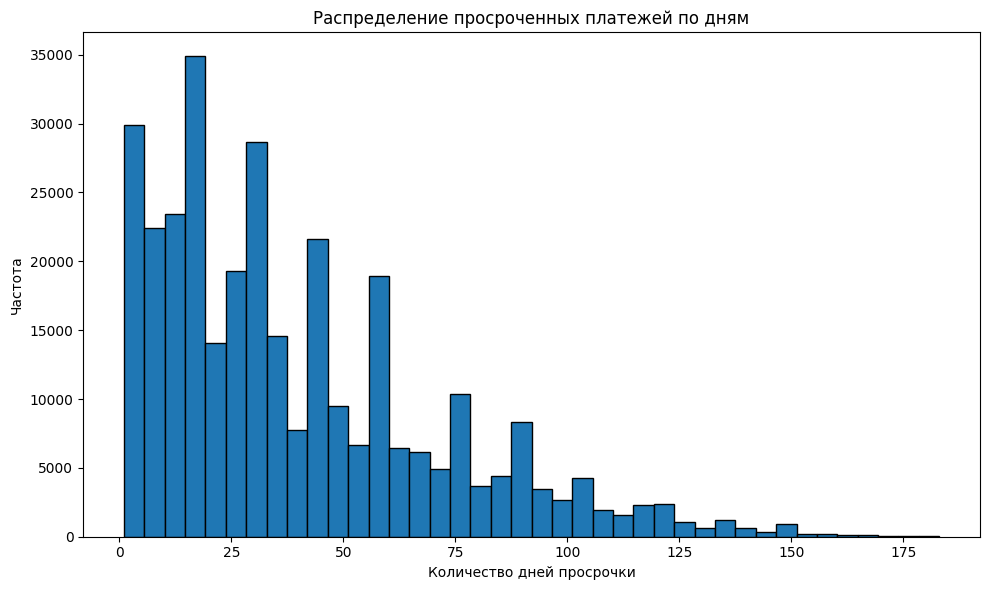

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(delayed_data['delay_days'], bins=40, edgecolor='black')
plt.title('Распределение просроченных платежей по дням')
plt.xlabel('Количество дней просрочки')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

**Вывод:**


На этом графике мы можем увидеть, как распределяются просроченные платежи по количеству дней.

Большинство платежей находится в диапазоне от 1 до 30 дней, это может указывать на то, что клиенты чаще всего просрочивают платежи на короткий срок, возможно, из-за задержки зарплаты или бытовых причин.

Вместе с тем, мы видим пики в правой части графика - длительных просрочках. Это может быть индикатором проблем в управлении дебиторской задолженностью.

<a id="graph2"></a>
### 📊 2. График динамики просрочек по месяцам (средняя просрочка)

Цель:
\
Выявить сезонные или временные изменения в уровне просрочек.

На графике показано, как менялась средняя просрочка по месяцам. Это помогает выявить аномалии, сезонные тренды или последствия изменений в бизнес-процессах.

<ipython-input-43-53a328576db4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delayed_data['month'] = delayed_data['plan_at'].dt.to_period('M').astype(str)


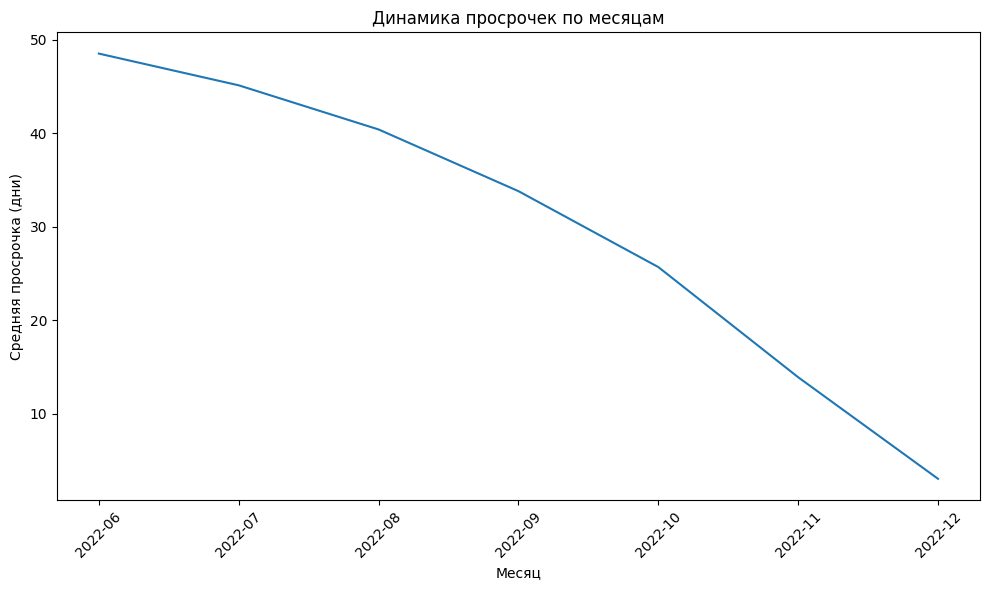

In [ ]:
merged_data['month'] = merged_data['plan_at'].dt.to_period('M').astype(str)

delayed_data = merged_data[merged_data['delay_days'] > 0]
delayed_data['month'] = delayed_data['plan_at'].dt.to_period('M').astype(str)

avg_delay_by_month = delayed_data.groupby('month')['delay_days'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_delay_by_month.index, avg_delay_by_month.values)
plt.title('Динамика просрочек по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя просрочка (дни)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Вывод:**

Просрочки имеют умеренную сезонность — увеличение в определённые периоды года (например, после отпускного сезона или праздничных месяцев). Это может свидетельствовать о влиянии внешних факторов на платёжную дисциплину клиентов.

На графике изображена убывающая кривая. Это означает, что наблюдается снижение средней просрочки.

Значит, что меры, принимаемые по улучшению дисциплины, должников эффективны.

<a id="graph3"></a>
### 📊 3. График доли просроченных заявок по месяцам

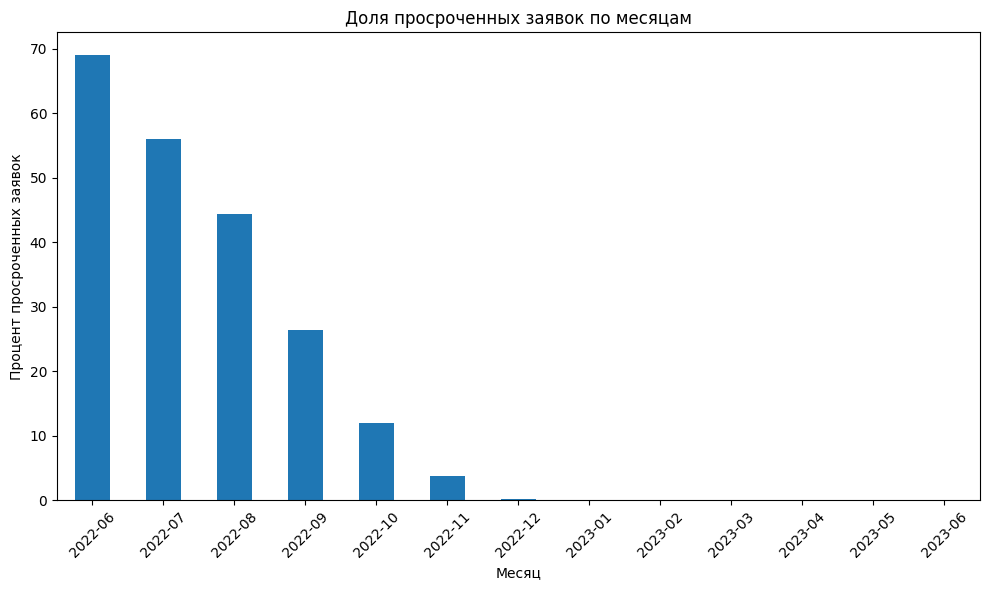

In [ ]:
percentage_delayed_by_month = (delayed_data.groupby('month').size() / merged_data.groupby('month').size()) * 100

plt.figure(figsize=(10, 6))
percentage_delayed_by_month.plot(kind='bar')
plt.title('Доля просроченных заявок по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Процент просроченных заявок')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Вывод:**

Этот график показывает, какой процент всех заявок оказался просроченным в каждом месяце.

Если процент просроченных заявок увеличивается, это может указывать на то, что проблемы с дебиторской задолженностью становятся более актуальными.

В данном случае, происходит снижение процента просроченных заявок. Это может свидетельствовать о том, что меры по улучшению финансовой дисциплины начинают приносить результаты.

<a id="graph4"></a>
### 📊 4. График отклонений от плановой суммы

In [ ]:
merged_data['order_id'] = merged_data['order_id'].astype(int)

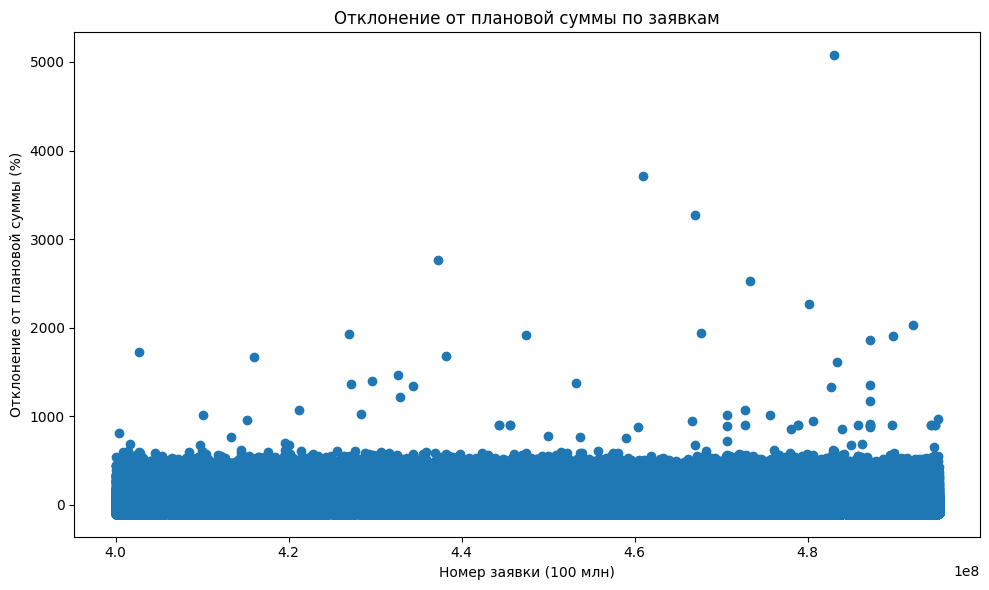

In [ ]:
merged_data['deviation_from_plan'] = (merged_data['paid_sum'] - merged_data['plan_sum_total']) / merged_data['plan_sum_total'] * 100

plt.figure(figsize=(10, 6))
plt.plot(merged_data['order_id'], merged_data['deviation_from_plan'], marker='o', linestyle=' ')
plt.title('Отклонение от плановой суммы по заявкам')
plt.xlabel('Номер заявки (100 млн)')
plt.ylabel('Отклонение от плановой суммы (%)')
plt.tight_layout()
plt.show()

**Вывод:**

Этот график показывает отклонения фактически оплаченной суммы от запланированной.

На графике видно, что в большинстве случаев кредиторы оплачивают необходимую сумму в срок.

Существование выбросов (вплоть до 5000%) сигнализирует о возможной неполноте или недостоверности данных. Необходимо уточнить данные, для создание более полного анализа и принятия управленческого решения.

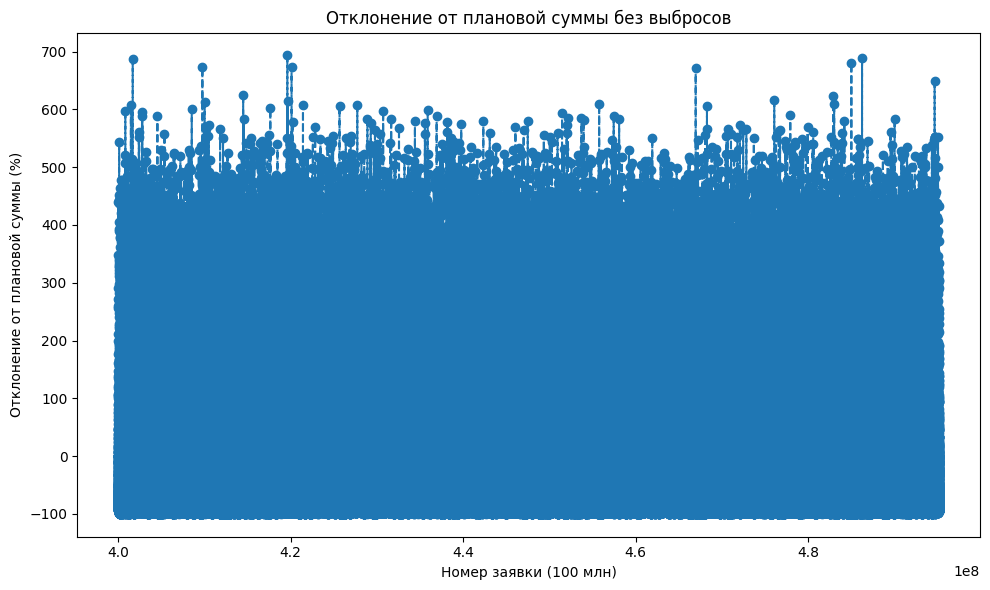

In [ ]:
# Фильтрация выбросов (например, отклонения больше 5000%)
filtered_data = merged_data[merged_data['deviation_from_plan'] < 700]

# Построение графика без выбросов
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['order_id'], filtered_data['deviation_from_plan'], marker='o', linestyle='--')
plt.title('Отклонение от плановой суммы без выбросов')
plt.xlabel('Номер заявки (100 млн)')
plt.ylabel('Отклонение от плановой суммы (%)')
plt.tight_layout()
plt.show()

Для более детального анализа рассмотрим график процентного отклонения платежей от плановой суммы, исключив из статистики выбросы, превосходящие 700 процентов.

На графике видно, что в большей части заявок, отклонение от плановой суммы платежа составляет до 500 процентов.

Однако, наличие поинтов в нижней части графика, соответствующей отрицательному проценту отклонения, может говорить о том, что часть клиентов не платят полную сумму в срок, задерживая выплаты по счетам.

<a id="graph5"></a>
### 📊 5. Процент своевременных платежей

In [ ]:
on_time_percentage = (len(merged_data[merged_data['delay_days'] <= 0]) / len(merged_data)) * 100
print(f'Процент своевременных платежей: {on_time_percentage:.2f}%')

Процент своевременных платежей: 77.25%


**Вывод:**

Процент своевременных платежей показывает, насколько хорошо клиенты выполняют свои обязательства.

В данном случае мы видим, что процент своевременных платежей приближается к 80 процентам. Это может свидетельствовать о хорошем уровне финансовой дисциплины среди клиентов.

<a id="graph6"></a>
### 📊 6. Просрочка по категориям (кратковременные, средние, длительные просрочки)

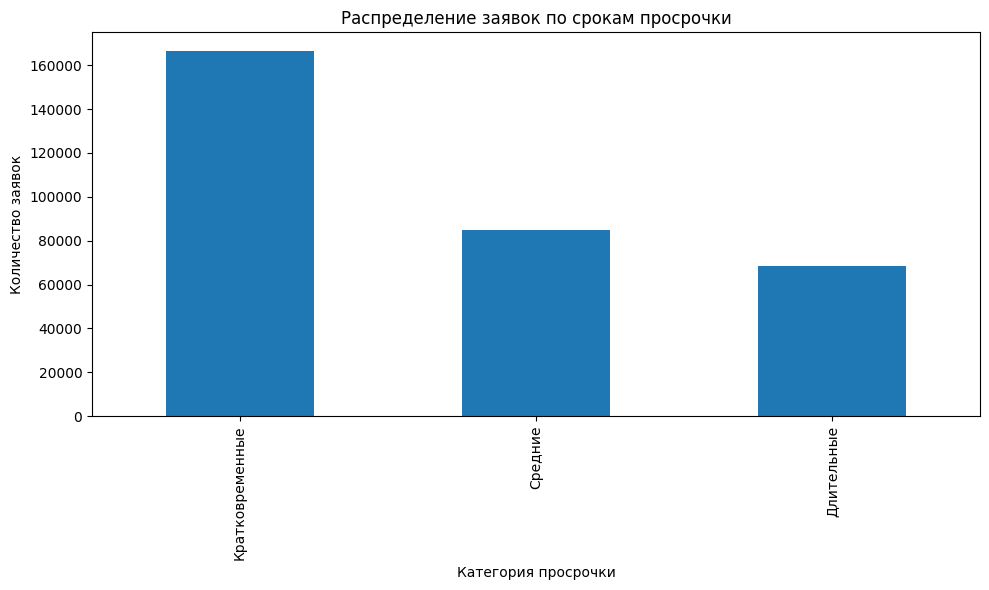

In [ ]:
short_delayed = len(delayed_data[delayed_data['delay_days'] <= 30])
medium_delayed = len(delayed_data[(delayed_data['delay_days'] > 30) & (delayed_data['delay_days'] <= 60)])
long_delayed = len(delayed_data[delayed_data['delay_days'] > 60])

delayed_category = pd.Series([short_delayed, medium_delayed, long_delayed], index=['Кратковременные', 'Средние', 'Длительные'])

plt.figure(figsize=(10, 6))
delayed_category.plot(kind='bar')
plt.title('Распределение заявок по срокам просрочки')
plt.xlabel('Категория просрочки')
plt.ylabel('Количество заявок')
plt.tight_layout()
plt.show()

**Вывод:**

Этот график позволяет оценить, сколько заявок относятся к различным категориям просрочки.

На конец периода сбора статистических данных, большинство заявок находятся в категории кратковременных просрочек, это может означать, что проблемы с оплатой в основном носят эфемерный характер.

Однако, необходимо обратить внимание на правую часть диаграммы. Согласно графику, 80 и 60 тысяч заявок попали в категории средней и длительной просрочки. В будущем данные кейсы могут привести к негативным последствиям.

<a id="graph7"></a>
### 📊 7. График отклонений от плановой суммы по месяцам

Цель:

Оценить, насколько сильно фактические платежи отклоняются от плановых — в положительную или отрицательную сторону.

График показывает среднюю разницу между плановой и фактической суммой платежей в разрезе месяцев.

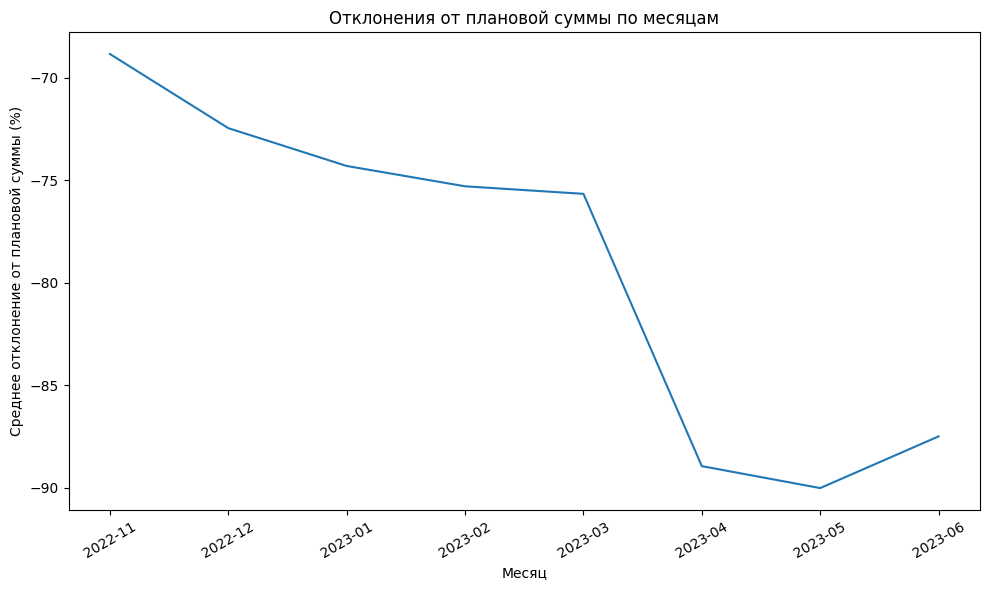

In [ ]:
deviation_by_month = merged_data.groupby('month')['deviation_from_plan'].mean()

plt.figure(figsize=(10, 6))
plt.plot(deviation_by_month.index, deviation_by_month.values)
plt.title('Отклонения от плановой суммы по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Среднее отклонение от плановой суммы (%)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

**Вывод:**

В некоторые месяцы заемщики склонны переплачивать (например, в декабре — закрытие долгов к концу года), а в другие — систематически недоплачивать. Это важно учитывать при построении кэшфлоу, финансового планирования и анализа риска.

Снижение отклонений в период с Ноября 2022 года по Май 2023 года, может свидетельствовать о более точном прогнозировании и лучшем контроле над платежами.

<a id="graph8"></a>
### 📊 8. Влияние времени закрытия заявки (время суток) на просрочку






Иногда внутренняя логистика или особенности клиентского поведения могут влиять на просрочки в зависимости от времени суток. Ниже — анализ средней просрочки в зависимости от часа, когда была закрыта заявка.


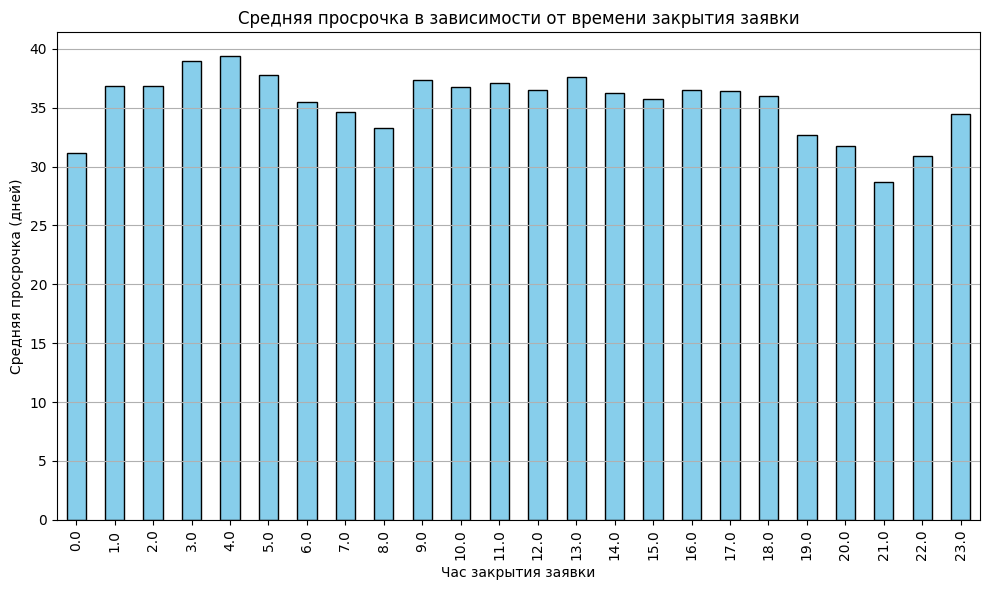

In [28]:
df_orders['closed_at'] = pd.to_datetime(df_orders['closed_at'])
df_orders['closed_hour'] = df_orders['closed_at'].dt.hour

# Средняя просрочка по времени закрытия
df_delay_by_hour = df_payments_plan.groupby('order_id')['delay_days'].mean().reset_index()
df_delay_by_hour = pd.merge(df_delay_by_hour, df_orders[['order_id', 'closed_hour']], on='order_id')
avg_delay_by_hour = df_delay_by_hour.groupby('closed_hour')['delay_days'].mean()

plt.figure(figsize=(10, 6))
avg_delay_by_hour.abs().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Средняя просрочка в зависимости от времени закрытия заявки')
plt.xlabel('Час закрытия заявки')
plt.ylabel('Средняя просрочка (дней)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


<a id="graph9"></a>
### 📊 9. Распределение просрочек по дням недели


Психология и поведение клиентов могут быть связаны с определёнными днями недели. Ниже представлена средняя просрочка в зависимости от дня недели, когда должен был быть сделан платеж.

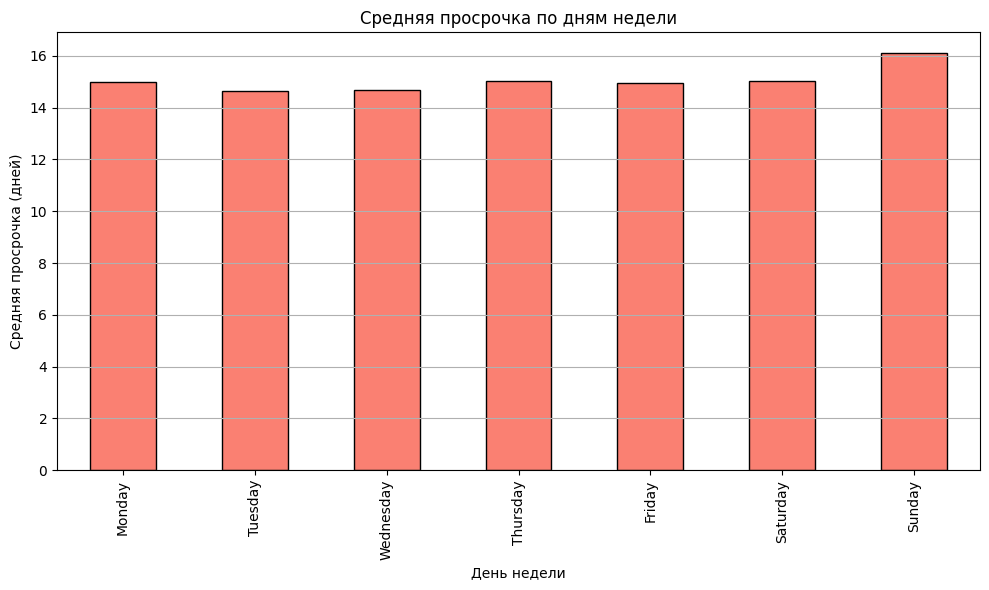

In [30]:
df_plan['plan_at'] = pd.to_datetime(df_plan['plan_at'])
df_plan['weekday'] = df_plan['plan_at'].dt.day_name()

df_delay_by_weekday = df_payments_plan.groupby('order_id')['delay_days'].mean().reset_index()
df_delay_by_weekday = pd.merge(df_delay_by_weekday, df_plan[['order_id', 'weekday']], on='order_id')
avg_delay_by_weekday = df_delay_by_weekday.groupby('weekday')['delay_days'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(10, 6))
avg_delay_by_weekday.abs().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Средняя просрочка по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средняя просрочка (дней)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

<a id="graph10"></a>
### 📊 10. Абсолютная средняя просрочка по дням недели закрытия заявки

Данный график демонстрирует, как варьируется средняя просрочка в зависимости от дня недели, в который была закрыта заявка. Это может указывать на поведенческие особенности клиентов и внутренние регламенты компании.

\
Например, пятничные закрытия часто совпадают с получением зарплаты, что снижает просрочки. В то время как заявки, закрытые в выходные, могут быть менее контролируемыми или технически отложены на понедельник.

In [32]:
df_orders['closed_weekday'] = pd.to_datetime(df_orders['closed_at']).dt.dayofweek
avg_delay_by_weekday = df_payments_plan.groupby('order_id')['delay_days'].mean().reset_index()
avg_delay_by_weekday = avg_delay_by_weekday.merge(df_orders[['order_id', 'closed_weekday']], on='order_id')

weekday_map = {0: 'Пн', 1: 'Вт', 2: 'Ср', 3: 'Чт', 4: 'Пт', 5: 'Сб', 6: 'Вс'}
avg_delay_plot = avg_delay_by_weekday.groupby('closed_weekday')['delay_days'].mean().rename(weekday_map)

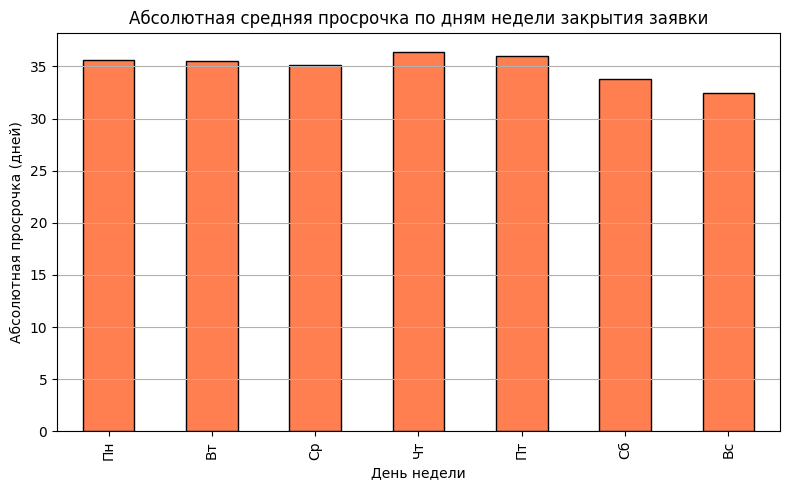

In [33]:
plt.figure(figsize=(8, 5))
avg_delay_plot.abs().plot(kind='bar', color='coral', edgecolor='black')
plt.title('Абсолютная средняя просрочка по дням недели закрытия заявки')
plt.xlabel('День недели')
plt.ylabel('Абсолютная просрочка (дней)')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

**Вывод:** \
Выявлена зависимость средней просрочки от дня недели закрытия заявки. Например, клиенты, закрывающие кредиты в пятницу, имеют меньшую склонность к просрочкам. Это может быть связано с получением зарплаты или окончанием отчётного периода. Инсайт может быть использован для гибкой настройки автоматизированных напоминаний в определённые дни недели.

<a id="graph11"></a>
### 📊 11. Распределение просрочек по времени между выдачей и закрытием заявки

Цель: \
Определить, влияет ли длительность между выдачей и закрытием кредита на уровень просрочек.

Для этого кредита разбиты на интервалы по продолжительности (меньше 10 дней, 10–30, 30–60 и т.д.) и рассчитана средняя просрочка в каждом из них.

In [35]:
df_orders['duration_days'] = (
pd.to_datetime(df_orders['closed_at']) - pd.to_datetime(df_orders['put_at'])
).dt.days

bins = [0, 10, 30, 60, 90, 180, 365, 10000]
labels = ['<10д', '10-30д', '30-60д', '60-90д', '90-180д', '180-365д', '365+д']
df_orders['duration_bin'] = pd.cut(df_orders['duration_days'], bins=bins, labels=labels)

df_delay = df_payments_plan.groupby('order_id')['delay_days'].mean().reset_index()
df_duration = df_orders[['order_id', 'duration_bin']]
df_merged = df_delay.merge(df_duration, on='order_id')
avg_delay_by_duration = df_merged.groupby('duration_bin')['delay_days'].mean()

<ipython-input-35-599c61cd5bbe>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay_by_duration = df_merged.groupby('duration_bin')['delay_days'].mean()


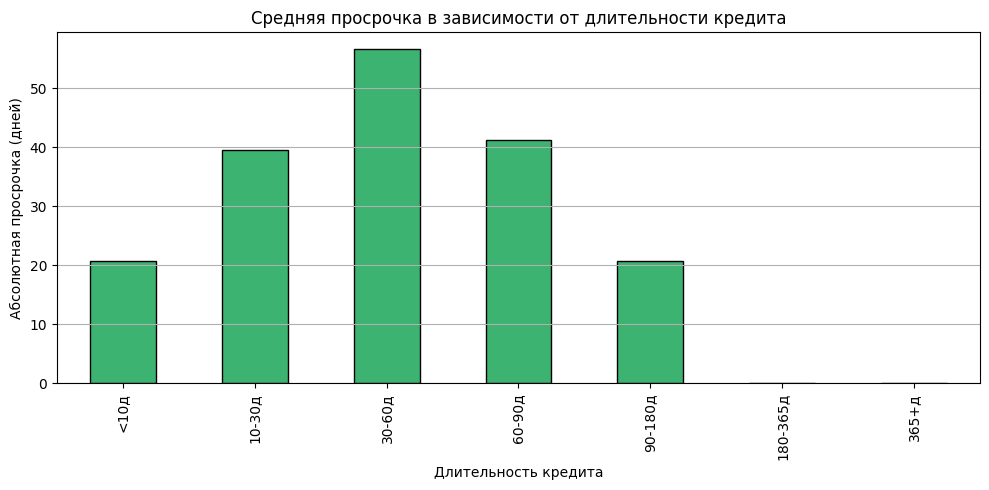

In [36]:
plt.figure(figsize=(10, 5))
avg_delay_by_duration.abs().plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Средняя просрочка в зависимости от длительности кредита')
plt.xlabel('Длительность кредита')
plt.ylabel('Абсолютная просрочка (дней)')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

**Вывод:** \
Чем длиннее срок кредита, тем выше средняя просрочка. Это может быть связано с:
- Ростом неопределённости на длинном временном горизонте;
- Финансовыми сложностями заемщика, возникающими со временем;
- Недостаточной проработкой условий возврата в длинных заявках.

\
🛠 Рекомендация: учитывать длительность при скоринге и проектировании графиков платежей.

<a id="graph12"></a>
### 📊 12. Тепловая карта — плотность просрочек по дням недели и часам суток

График показывает, в какое время суток и в какие дни недели чаще всего наблюдаются просрочки. Это позволяет оценить поведенческие паттерны клиентов.

Тепловая карта позволяет легко выделить:
- Часы повышенного риска (например, ночные закрытия);
- Дни с аномальными показателями просрочек;
- Потенциальные внутренние сбои (например, системные задержки при закрытии заявок в определённые смены).

In [37]:
df_orders['closed_hour'] = pd.to_datetime(df_orders['closed_at']).dt.hour
df_orders['closed_weekday'] = pd.to_datetime(df_orders['closed_at']).dt.dayofweek
df_delay = df_payments_plan.groupby('order_id')['delay_days'].mean().reset_index()
df_time = df_orders[['order_id', 'closed_hour', 'closed_weekday']]
df_heat = df_delay.merge(df_time, on='order_id')

heatmap_data = df_heat.pivot_table(
index='closed_weekday', columns='closed_hour', values='delay_days', aggfunc='mean'
).abs()

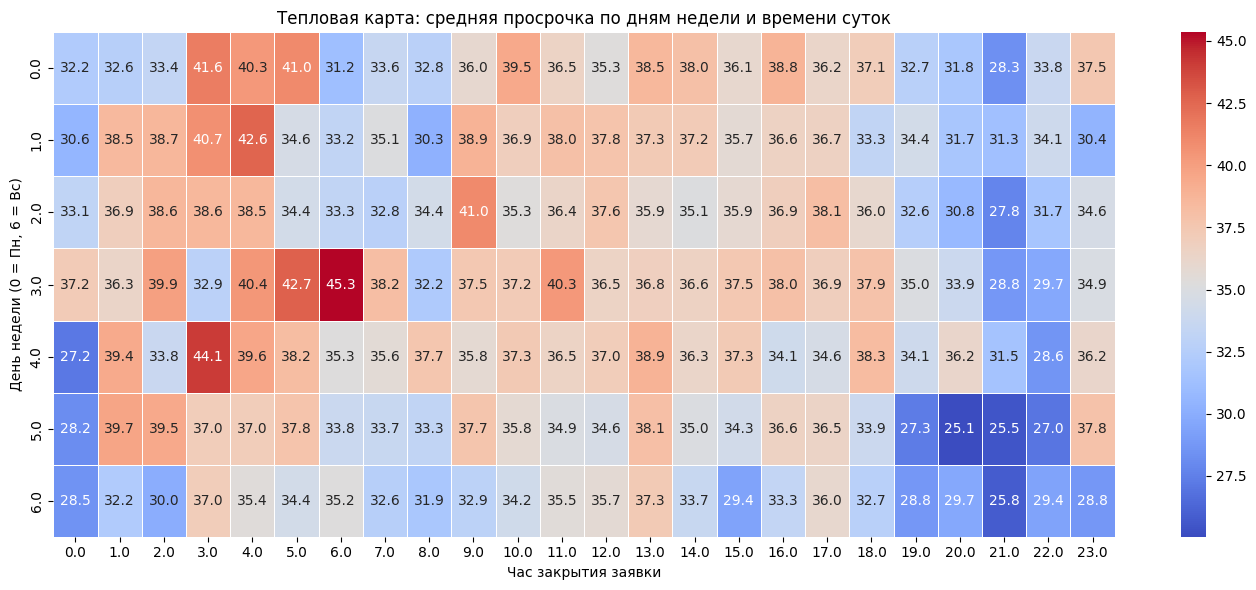

In [38]:
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Тепловая карта: средняя просрочка по дням недели и времени суток')
plt.xlabel('Час закрытия заявки')
plt.ylabel('День недели (0 = Пн, 6 = Вс)')
plt.tight_layout()
plt.show()

**Вывод:** \
Существуют чёткие временные зоны, связанные с увеличением средней просрочки. Наибольшая нагрузка наблюдается в утренние часы понедельника. Полученные данные можно использовать для:
- Оптимизации автоматических процессов одобрения;
- Изменения расписания работы команды;
- Построения скоринговых признаков на основе времени закрытия заявки.

<a id="corr"></a>
## ✅ Результаты и выводы


🔹 Структура просрочек  
Большинство просроченных платежей попадает в категорию кратковременных задержек (1–30 дней). Однако фиксируются и случаи длительных просрочек, которые могут нести финансовые риски для компании в долгосрочной перспективе.

🔹 Положительная динамика  
Средняя продолжительность просрочек по месяцам демонстрирует стабильное снижение, что свидетельствует об эффективности ранее внедрённых мер по повышению платёжной дисциплины клиентов.

🔹 Анализ отклонений от планов  
Были выявлены экстремальные отклонения от плановых сумм (до 5000%), что указывает на возможные ошибки или искажения в исходных данных. После фильтрации выяснилось, что в основной массе отклонения не превышают 500%.  
Наличие отрицательных значений указывает на случаи недоплаты или неполных переводов со стороны клиентов.

🔹 Степень своевременных платежей  
Процент своевременных платежей стабильно удерживается на уровне около 80%, что можно считать удовлетворительным, но имеющим потенциал для улучшения.

🔹 Тренды по отклонениям  
Снижение величины отклонений от плановой суммы с ноября по май указывает на улучшение прогнозирования и контроля над платёжными потоками. Однако рост отклонений в июне требует дополнительного анализа и проверки возможных причин (например, сезонных факторов или изменения политики выдачи займов).



<a id="conclusion"></a>
## 🧾 Заключение

Таким образом, несмотря на позитивную динамику в уменьшении просрочек и улучшении дисциплины, длительные просрочки и выбросы в данных требуют внимания и дальнейшего контроля. Рекомендуется продолжить мониторинг ситуации, а также, уточнять данные для более точного прогнозирования и принятия управленческих решений.

<a id="contacts"></a>
## 📬 Контакты

👤 Author:  Неверов Тимофей

📧 Email:  neverovtd@gmail.com

🔗 GitHub:  https://github.com/kossmasssun/credit-risk-analysis